# Four queens

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_state_city, plot_histogram

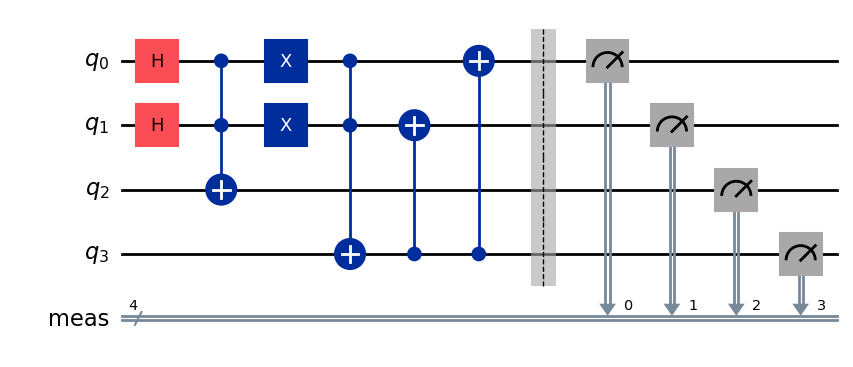

In [16]:
row_circuit = QuantumCircuit(4, name="row")

row_circuit.h(0)
row_circuit.h(1)

row_circuit.ccx(0, 1, 2)
row_circuit.x(0)
row_circuit.x(1)
row_circuit.ccx(0, 1, 3)

row_circuit.cx(3, 1)
row_circuit.cx(3, 0)
row_circuit.measure_all()
row = row_circuit.to_instruction()
row_circuit.draw(output="mpl")

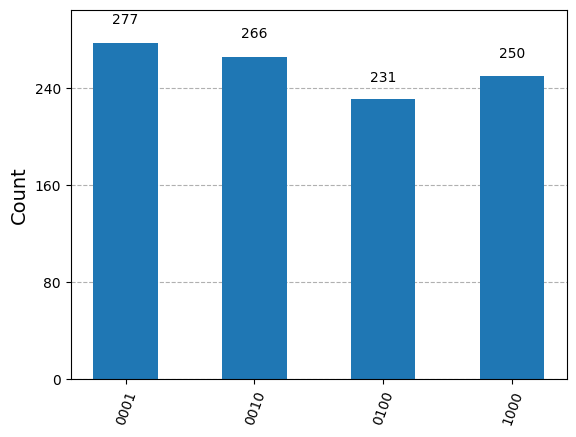

In [17]:
# Simulator
simulator = AerSimulator(method="statevector", device="GPU")

row_circuit.save_statevector()

# Execution on simulator
row_result = simulator.run(row_circuit).result()

row_sv = row_result.get_statevector(row_circuit)
plot_histogram(row_result.get_counts(row_circuit))

In [5]:
qc = QuantumCircuit(25)
n = 4
# 4x4 16 qubits representing 16 position in the board
# built with row gate(rgate), so each row has only one qubit excited (repesenting queen)
for i in range(0, n*n, n):
    qc.append(row, [i for i in range(i, i+n)])

qc = qc.decompose()
qc.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=25, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(25, 'q'), 0), Qubit(QuantumRegister(25, 'q'), 1), Qubit(QuantumRegister(25, 'q'), 2), Qubit(QuantumRegister(25, 'q'), 3), Qubit(QuantumRegister(25, 'q'), 4), Qubit(QuantumRegister(25, 'q'), 5), Qubit(QuantumRegister(25, 'q'), 6), Qubit(QuantumRegister(25, 'q'), 7), Qubit(QuantumRegister(25, 'q'), 8), Qubit(QuantumRegister(25, 'q'), 9), Qubit(QuantumRegister(25, 'q'), 10), Qubit(QuantumRegister(25, 'q'), 11), Qubit(QuantumRegister(25, 'q'), 12), Qubit(QuantumRegister(25, 'q'), 13), Qubit(QuantumRegister(25, 'q'), 14), Qubit(QuantumRegister(25, 'q'), 15), Qubit(QuantumRegister(25, 'q'), 16), Qubit(QuantumRegister(25, 'q'), 17), Qubit(QuantumRegister(25, 'q'), 18), Qubit(QuantumRegister(25, 'q'), 19), Qubit(QuantumRegister(25, 'q'), 20), Qubit(QuantumRegister(25, 'q'), 21), Qubit(QuantumRegister(25, 'q'), 22), Qubit(QuantumRegister(25, 'q'), 23), Qubit(QuantumReg

In [6]:
# n-1(here, 3) ancillas for column check
qc.h(16)
qc.h(17)
qc.h(18)

for i in range(0, 16, 4):
    qc.cz(16, i)
    qc.cz(17, i+1)
    qc.cz(18, i+2)

qc.h(16)
qc.h(17)
qc.h(18)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=25, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(25, 'q'), 0), Qubit(QuantumRegister(25, 'q'), 1), Qubit(QuantumRegister(25, 'q'), 2), Qubit(QuantumRegister(25, 'q'), 3), Qubit(QuantumRegister(25, 'q'), 4), Qubit(QuantumRegister(25, 'q'), 5), Qubit(QuantumRegister(25, 'q'), 6), Qubit(QuantumRegister(25, 'q'), 7), Qubit(QuantumRegister(25, 'q'), 8), Qubit(QuantumRegister(25, 'q'), 9), Qubit(QuantumRegister(25, 'q'), 10), Qubit(QuantumRegister(25, 'q'), 11), Qubit(QuantumRegister(25, 'q'), 12), Qubit(QuantumRegister(25, 'q'), 13), Qubit(QuantumRegister(25, 'q'), 14), Qubit(QuantumRegister(25, 'q'), 15), Qubit(QuantumRegister(25, 'q'), 16), Qubit(QuantumRegister(25, 'q'), 17), Qubit(QuantumRegister(25, 'q'), 18), Qubit(QuantumRegister(25, 'q'), 19), Qubit(QuantumRegister(25, 'q'), 20), Qubit(QuantumRegister(25, 'q'), 21), Qubit(QuantumRegister(25, 'q'), 22), Qubit(QuantumRegister(25, 'q'), 23), Qubit(QuantumReg

In [7]:
# n(n-1)/2 (here, 6) ancillas for diagonal check
qc.x(19)
qc.x(20)
qc.x(21)
qc.x(22)
qc.x(23)
qc.x(24)
# row1, row2 -> qubit19
qc.ccx(0, 5, 19)
qc.ccx(1, 6, 19)
qc.ccx(2, 7, 19)
qc.ccx(1, 4, 19)
qc.ccx(2, 5, 19)
qc.ccx(3, 6, 19)

# row1, row3 -> qubit20
qc.ccx(0, 10, 20)
qc.ccx(1, 11, 20)
qc.ccx(2, 8, 20)
qc.ccx(3, 9, 20)

# row1, row4 -> qubit21
qc.ccx(0, 15, 21)
qc.ccx(3, 12, 21)

# row2, row3 -> qubit22
qc.ccx(4, 9, 22)
qc.ccx(5, 10, 22)
qc.ccx(6, 11, 22)
qc.ccx(5, 8, 22)
qc.ccx(6, 9, 22)
qc.ccx(7, 10, 22)

#row2, row4 -> qubit23
qc.ccx(4, 14, 23)
qc.ccx(5, 15, 23)
qc.ccx(6, 12, 23)
qc.ccx(7, 13, 23)

# row3, row4 -> qubit24
qc.ccx(8, 13, 24)
qc.ccx(9, 14, 24)
qc.ccx(10, 15, 24)
qc.ccx(9, 12, 24)
qc.ccx(10, 13, 24)
qc.ccx(11, 14, 24)

qc.measure_all()

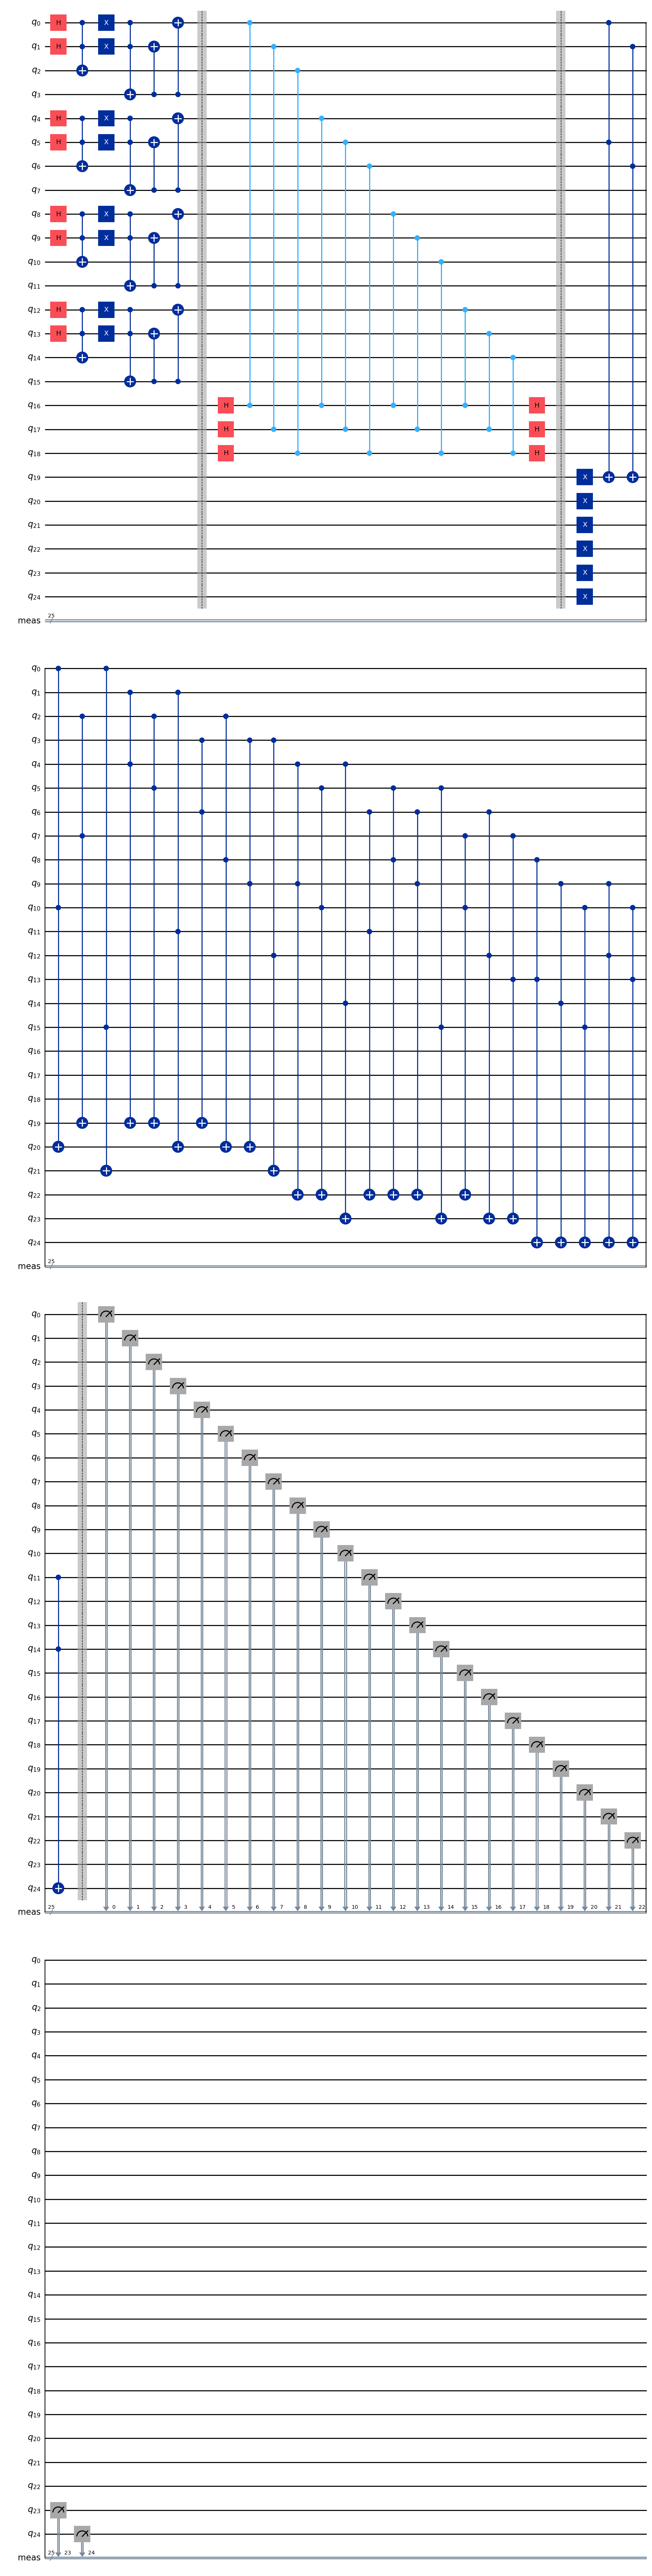

In [8]:
qc.draw(output="mpl")

In [9]:
# Simulator
simulator = AerSimulator(method="statevector", device="GPU")
# simulator = Aer.get_backend('statevector_simulator')

qc.save_statevector()

# Execution on simulator
result = simulator.run(qc, shots=1024).result()

sv = result.get_statevector(qc)

counts = result.get_counts(qc)
print(len(counts))


250


In [10]:
# pretty print
def position(key):
    for i in range(0, 16):
        print('q' if key[24-i] == '1' else '.', end=' ')
        if (i+1)%4 == 0:
            print()

In [13]:
# filter out the output, all ancillary bits should be 1
import re
regex = re.compile(r'1{9}[01]+')

for key, value in counts.items():
    if regex.match(key):
        position(key)
        print()

. q . . 
. . . q 
q . . . 
. . q . 

. . q . 
q . . . 
. . . q 
. q . . 

